In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [6]:
eval_dir = Path("/Users/michaeldoherty/git/vone_drl/eval")
nsc_ksp_fdl = eval_dir / "nsc_ksp_fdl_df.csv"
nodes = eval_dir / "agent_nodes_masked.csv"
paths = eval_dir / "agent_routes_masked.csv"

In [7]:
df_heur = pd.read_csv(nsc_ksp_fdl)
nodes = pd.read_csv(nodes)
paths = pd.read_csv(paths)
paths

,Unnamed: 0,load,reward,std,blocking,blocking_std
0,0,1,9.983333,0.003771,-0.998133,0.000377
1,1,2,9.804667,0.024730,-0.980267,0.002473
2,2,3,9.469333,0.022881,-0.946733,0.002288
3,3,4,8.863333,0.046657,-0.886133,0.004666
4,4,5,8.354667,0.061759,-0.835267,0.006176
5,5,6,7.851333,0.069844,-0.784933,0.006984
6,6,7,7.266667,0.095280,-0.726467,0.009528
7,7,8,6.838000,0.022686,-0.683600,0.002269
8,8,9,6.453333,0.075637,-0.645133,0.007564
9,9,10,6.180000,0.069532,-0.617800,0.006953


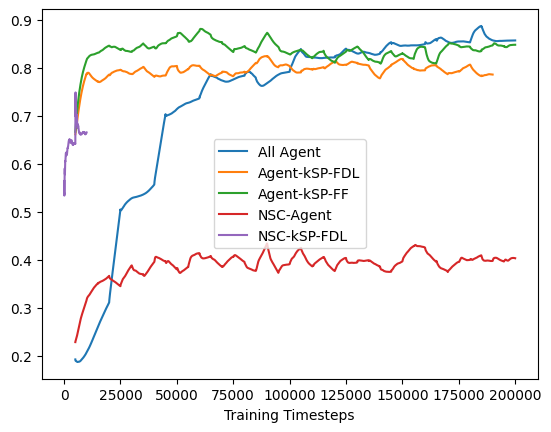

In [38]:
#plt.plot(df.index, df.rolling(100, on="acceptance_ratio")., label="All Agent")
plt.plot(df_agent.index, df_agent.acceptance_ratio.rolling(5000).mean(), label="All Agent")
plt.plot(df_node_fdl.index, df_node_fdl.acceptance_ratio.rolling(5000).mean(), label="Agent-kSP-FDL")
plt.plot(df_node_ff.index, df_node_ff.acceptance_ratio.rolling(5000).mean(), label="Agent-kSP-FF")
plt.plot(df_route.index, df_route.acceptance_ratio.rolling(5000).mean(), label="NSC-Agent")
plt.plot(df_nsc_ksp_fdl.index, df_nsc_ksp_fdl.acceptance_ratio.rolling(100).mean(), label="NSC-kSP-FDL")
plt.xlabel("Training Timesteps")
plt.legend()


# Next steps

### Complete routing action masking

### Compare with other DRL algorithm (DeepVINE)?